# prediction of car prices

- 자동차 가격을 예측하는데 중요한 변수는 무엇인가?

- 이 변수들은 자동차 가격을 얼마나 잘 설명 하는가?

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [4]:
df=pd.DataFrame(pd.read_csv("C:\\Users\\hsgn2\\PycharmProjects\\minicharm\\git_ML\\DataCB\\source\\CarPrice_Assignment.csv"))

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.shape

(205, 26)

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Data Cleaning

In [10]:
#중복된 데이터 찾기
sum(df.duplicated(subset='car_ID')) ==0 

True

In [11]:
#Null 값 확인
df.isnull().sum()*100/df.shape[0]

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [12]:
#price:Target Variable
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

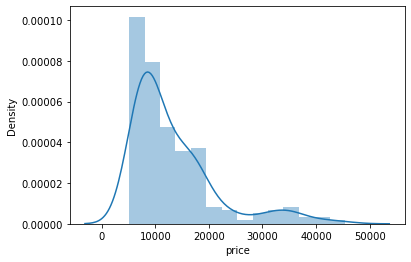

In [13]:
sns.distplot(df['price'])

- 표준편차가 크다 (자동차 가격에 상당한 차이가 있다)

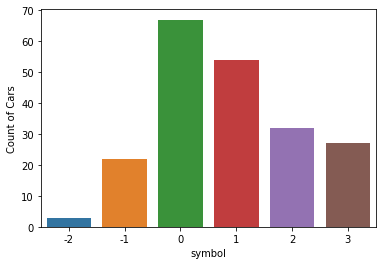

<Figure size 432x288 with 0 Axes>

In [14]:
plt1=sns.countplot(df['symboling'])
plt1.set(xlabel='symbol',ylabel='Count of Cars')
plt.show()
plt.tight_layout()

- car_ID:unique ID 이다.(primary key)
- symboling : +3이면 위험등급이고,-3 이면 꽤 안전하다는 것을 의미하는 보험위험등급을 나타냄

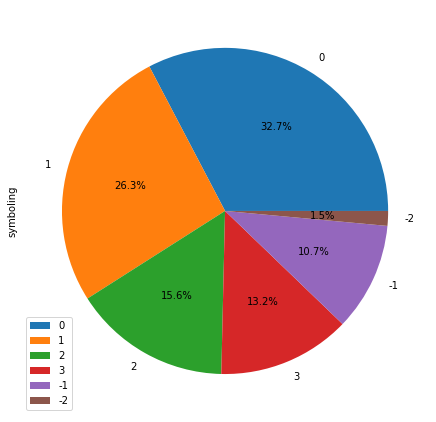

<Figure size 432x288 with 0 Axes>

In [15]:
df_sym=pd.DataFrame(df['symboling'].value_counts())
df_sym.plot.pie(subplots=True,labels=df_sym.index.values,autopct='%1.1f%%'
               ,figsize=(15,7.5))
plt.gca().set_aspect('equal') #(x,y)축의 비율을 동일하게 만든다.
plt.show()
plt.tight_layout()

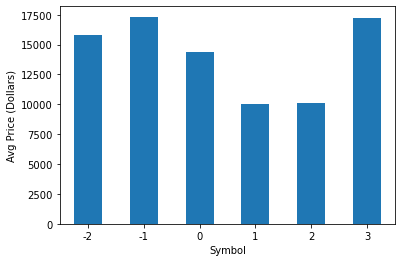

In [16]:
plt1=df[['symboling','price']].groupby("symboling").mean().plot(kind='bar'
                                                               ,legend=False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation=0)
plt.show()

- 차의 50% 이상의 symbol이 0 또는 1이다.
- 차의 평균 가격은 symbol 0,1,2에서 낮다.

### Car Name

In [17]:
df.CarName.values[0:10]

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000',
       'audi 5000s (diesel)'], dtype=object)

- Car Name은 두개의 구성으로 나눠져있다.'Car company'+''+'Car Model'

In [18]:
df['brand']=df.CarName.str.split(' ').str.get(0).str.upper()

In [19]:
len(set(df.brand.values))

27

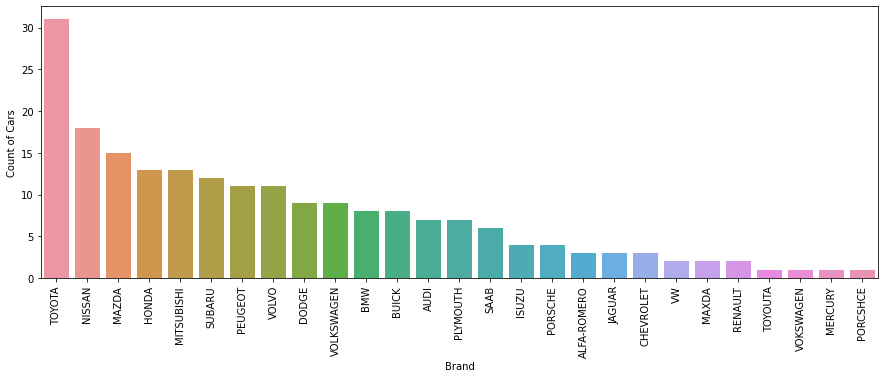

<Figure size 432x288 with 0 Axes>

In [20]:
fig, ax =plt.subplots(figsize=(15,5))
plt1=sns.countplot(df['brand'],order=pd.value_counts(df['brand']).index,)
plt1.set(xlabel='Brand',ylabel='Count of Cars')
xticks(rotation=90)
plt.show()
plt.tight_layout()

- 'VOLKSWAGON'는 VOLKSWAGEN,VOKSWAGEN,VW 세가지 종류로 나뉜다.
- 'MAZDA'는 MAXDA라고도 한다.
- 'PORSCHE'는 PORSCHE,PORCSHE


In [21]:
df['brand']=df['brand'].replace(['VW','VOKSWAGEN'],'VOLKSWAGEN')
df['brand']=df['brand'].replace(['MAXDA'],'MAZDA')
df['brand']=df['brand'].replace(['PORCSHCE'],'PORSCHE')
df['brand']=df['brand'].replace(['TOYOUTA'],'TOYOTA')

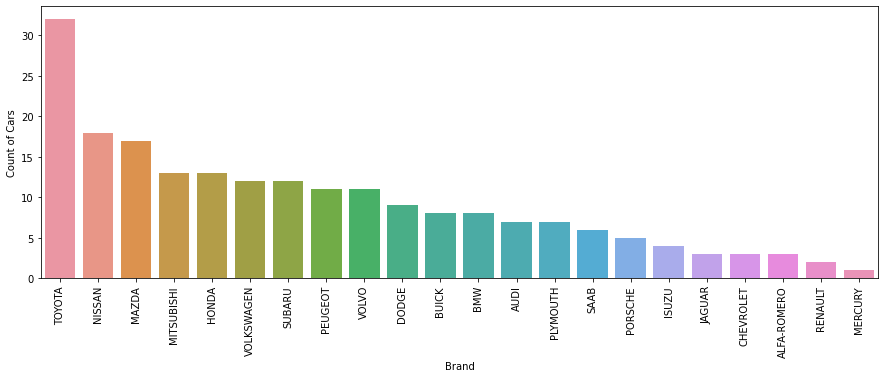

<Figure size 432x288 with 0 Axes>

In [22]:
fig,ax=plt.subplots(figsize=(15,5))
plt1=sns.countplot(df['brand'],order=pd.value_counts(df['brand']).index,)
plt1.set(xlabel='Brand',ylabel='Count of Cars')
xticks(rotation=90)
plt.show()
plt.tight_layout()

In [23]:
df.brand.describe()

count        205
unique        22
top       TOYOTA
freq          32
Name: brand, dtype: object

- Toyota는 일본 회사 중에서 가장 많은 모델을 보유하고 있다.

<function matplotlib.pyplot.show(close=None, block=None)>

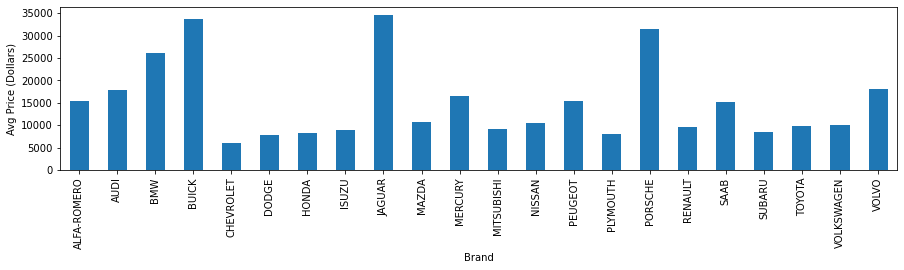

In [24]:
df_comp_avg_price=df[['brand','price']].groupby("brand",as_index=False).mean().rename(columns={'price':'brand_avg_price'})
# df_comp_avg_price에 brand,price를 groupby함수로 이용하여  key 값은 price, value는  price의 평균 값으로 구성한다.
plt1=df_comp_avg_price.plot(x='brand',kind='bar',legend=False,sort_columns=True,figsize=(15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation=90)
plt.show

In [25]:
df_comp_avg_price

,brand,brand_avg_price
0,ALFA-ROMERO,15498.333333
1,AUDI,17859.166714
2,BMW,26118.750000
3,BUICK,33647.000000
4,CHEVROLET,6007.000000
5,DODGE,7875.444444
6,HONDA,8184.692308
7,ISUZU,8916.500000
8,JAGUAR,34600.000000
9,MAZDA,10652.882353


In [26]:
df=df.merge(df_comp_avg_price,on='brand') #df_comp_avg_price의 고유 값을 병합한다.

In [27]:
df['brand_category']= df['brand_avg_price'].apply(lambda x : "Budget" if x < 10000
                                                    else ("Mid_Range" if 10000 <= x<20000
                                                         else "Luxury"))

- Toyota 는 시장에서 상당히 많은 차종을 보유하고 있다?
- Brand는 각자의 평균 가격에 따라 Luxury, Mid Ranged, Budget으로 분류 될 수 있다.

### Fuel Type

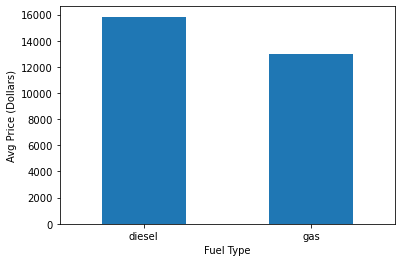

In [28]:
df_fuel_avg_price=df[['fueltype','price']].groupby("fueltype",as_index=False).mean().rename(columns={'price':'fuel_avg_price'})
plt1=df_fuel_avg_price.plot(x='fueltype',kind='bar',legend=False,sort_columns=True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation=0)
plt.show()

### Aspiration

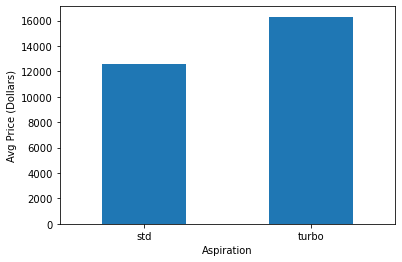

In [29]:
df_aspir_avg_price=df[['aspiration','price']].groupby("aspiration",as_index=False).mean().rename(columns={'price':'aspir_avg_price'})
plt1=df_aspir_avg_price.plot(x='aspiration',kind='bar',legend=False,sort_columns=True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

- turbo 엔진이 평범한 엔진보다 가격이 비싼 것을 알 수 있다.

### Door Numbers

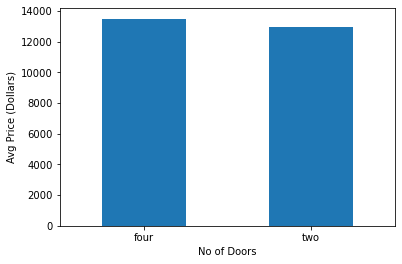

In [30]:
df_door_avg_price=df[['doornumber','price']].groupby("doornumber",as_index=False).mean().rename(columns={'price':'door_avg_price'})
plt1=df_door_avg_price.plot(x='doornumber',kind='bar',legend=False,sort_columns=True)
plt1.set_xlabel("No of Doors")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

- 문의 갯수는 가격에 영향을 많이 끼치지 않는 것 같다.

### Car Body

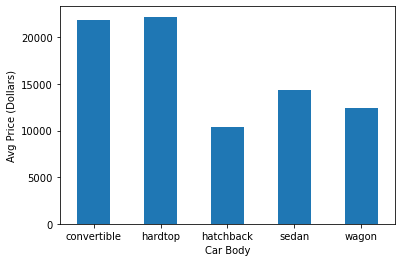

In [31]:
df_body_avg_price=df[['carbody','price']].groupby("carbody",as_index=False).mean().rename(columns={'price':'carbody_avg_price'})
plt1=df_body_avg_price.plot(x='carbody',kind='bar',legend=False,sort_columns=True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

- Hardtop과 convertible은 가장 비싸다. 그에 비해 hatchback은 가장 싸다.

### Drivewheel

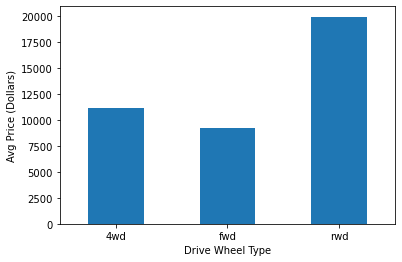

In [32]:
df_drivewheel_avg_price=df[['drivewheel','price']].groupby("drivewheel",as_index=False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1=df_drivewheel_avg_price.plot(x='drivewheel',kind='bar',legend=False,sort_columns=True,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

- 후륜기동차량이 가격이 더 높다.

### Wheel base

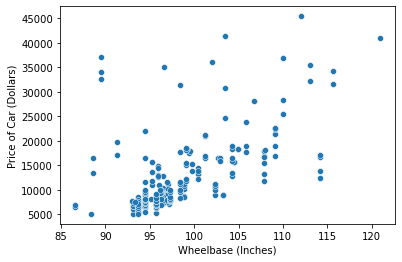

In [33]:
plt1=sns.scatterplot(x='wheelbase',y='price',data=df)
plt1.set_xlabel('Wheelbase (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

- 대부분의 차들은 95인치 정도의 휠베이스를 갖고 있다.
- 가격은 휠베이스와 양의 상관관계를 갖고 있다.

### Car Dimensions

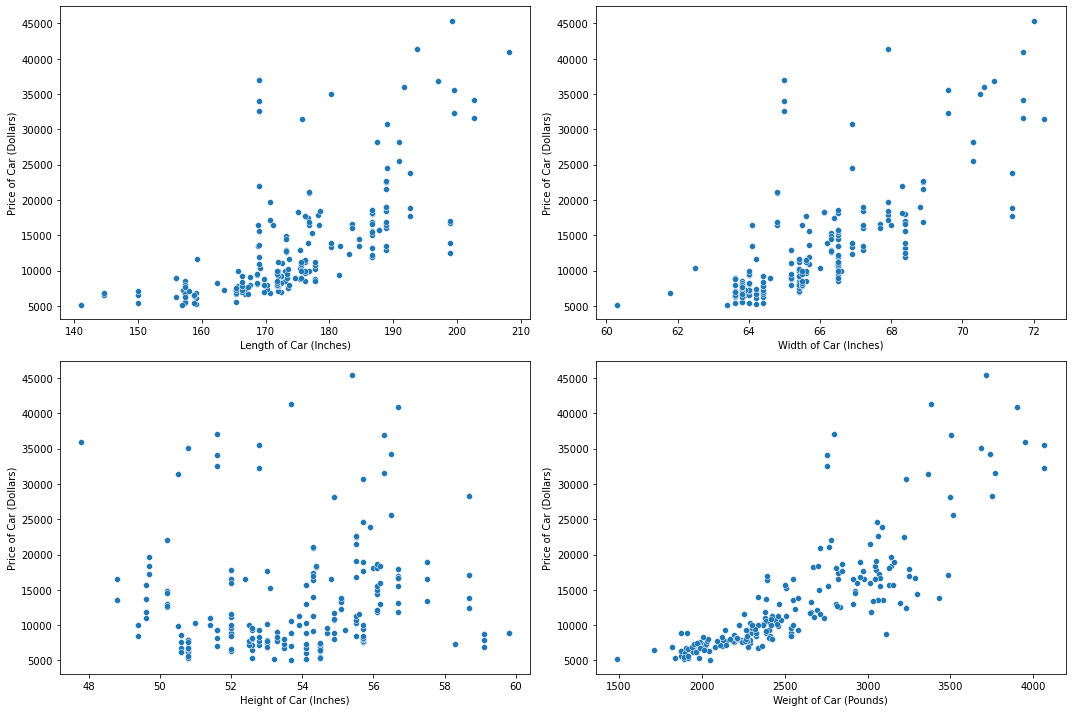

In [34]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1 = sns.scatterplot(x = 'carlength', y = 'price', data = df, ax = axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
#자동차의 길이와 가격
plt2 = sns.scatterplot(x = 'carwidth', y = 'price', data = df, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')
#자동차의 폭과 가격
plt3 = sns.scatterplot(x = 'carheight', y = 'price', data = df, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')
#자동차의 높이와 가격
plt3 = sns.scatterplot(x = 'curbweight', y = 'price', data = df, ax = axs[1,1])
plt3.set_xlabel('Weight of Car (Pounds)')
plt3.set_ylabel('Price of Car (Dollars)')
#자동차의 무게와 가격
plt.tight_layout()

- 차의 길이,폭,무게는 가격과 밀접한 관련이 있다
- 높이는 가격과 상관관계가 없다

## Engine Specifications(엔진 사양)

### Engine Type, Cylinder, Fuel System(엔진 유형, 실린더, 연료)

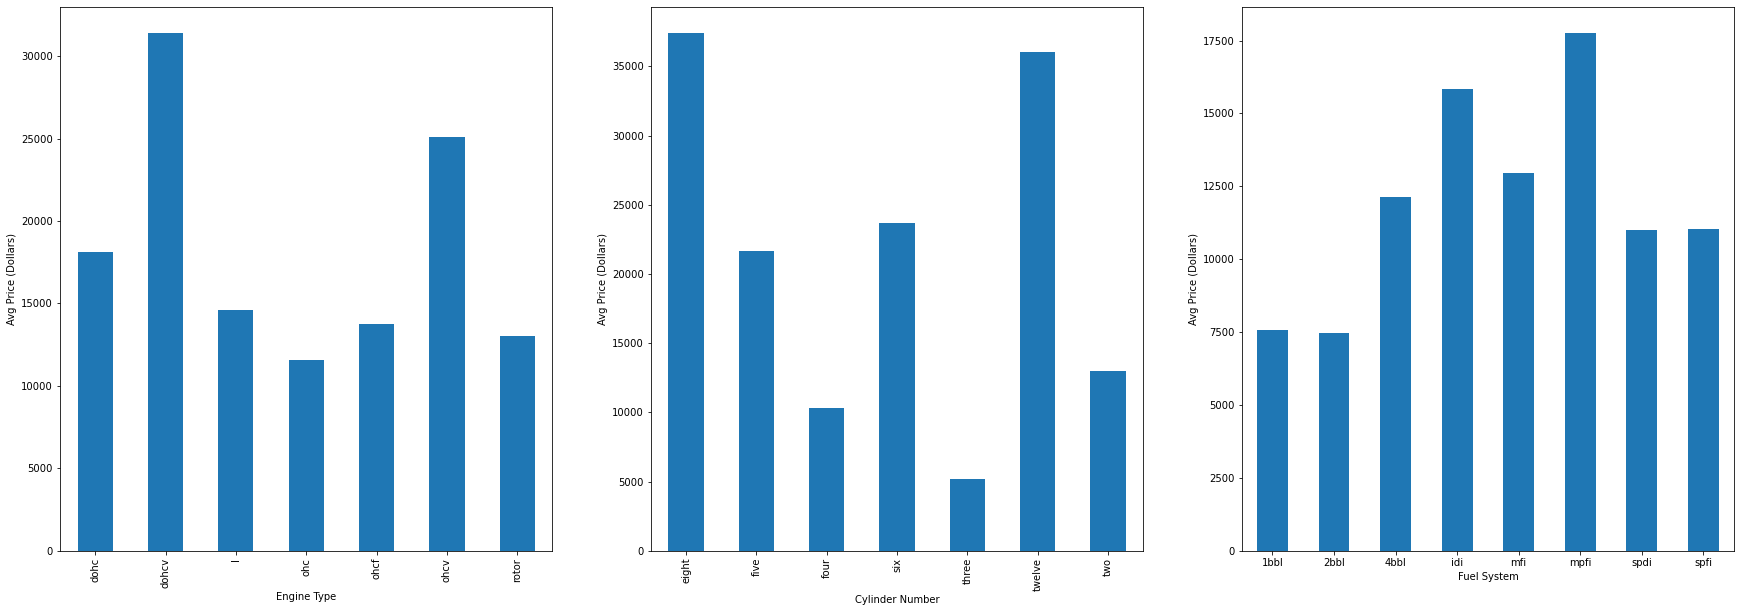

In [36]:
fig, axs = plt.subplots(1,3,figsize=(30,10))
#한번에 여러 그래프를 보여준다.
#fig:전체 사이즈
#ax:전체 중 낱낱개를 말한다.
df_engine_avg_price = df[['enginetype','price']].groupby("enginetype", as_index = False).mean().rename(columns={'price':'engine_avg_price'})
plt1 = df_engine_avg_price.plot(x = 'enginetype', kind='bar', sort_columns = True, legend = False, ax = axs[0])
plt1.set_xlabel("Engine Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
#엔진의 평균가
df_cylindernumber_avg_price = df[['cylindernumber','price']].groupby("cylindernumber", as_index = False).mean().rename(columns={'price':'cylindernumber_avg_price'})
plt1 = df_cylindernumber_avg_price.plot(x = 'cylindernumber', kind='bar', sort_columns = True,legend = False, ax = axs[1])
plt1.set_xlabel("Cylinder Number")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
#실린더의 평균가
df_fuelsystem_avg_price = df[['fuelsystem','price']].groupby("fuelsystem", as_index = False).mean().rename(columns={'price':'fuelsystem_avg_price'})
plt1 = df_fuelsystem_avg_price.plot(x = 'fuelsystem', kind='bar', sort_columns = True,legend = False, ax = axs[2])
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Avg Price (Dollars)")
#연료시스템의 평균가
xticks(rotation = 0)
plt.show()

- DOHCV, OHCV 엔진은 가격이 가장 비싼 가격이다.
- 8개와 12개의 실린더가 가장 비싼 가격이다.
- IDI, MPFI 연료 시스템이 가장 비싼 가격이다. 

### Engine Size, Bore Ratio, Stroke, Horsepower & Compression Ratio
(엔진 크기, 보어비(피스톤의 직경), 스트로크(피스톤이 상하로 운동할 수 있는 거리), 마력과 압축비)

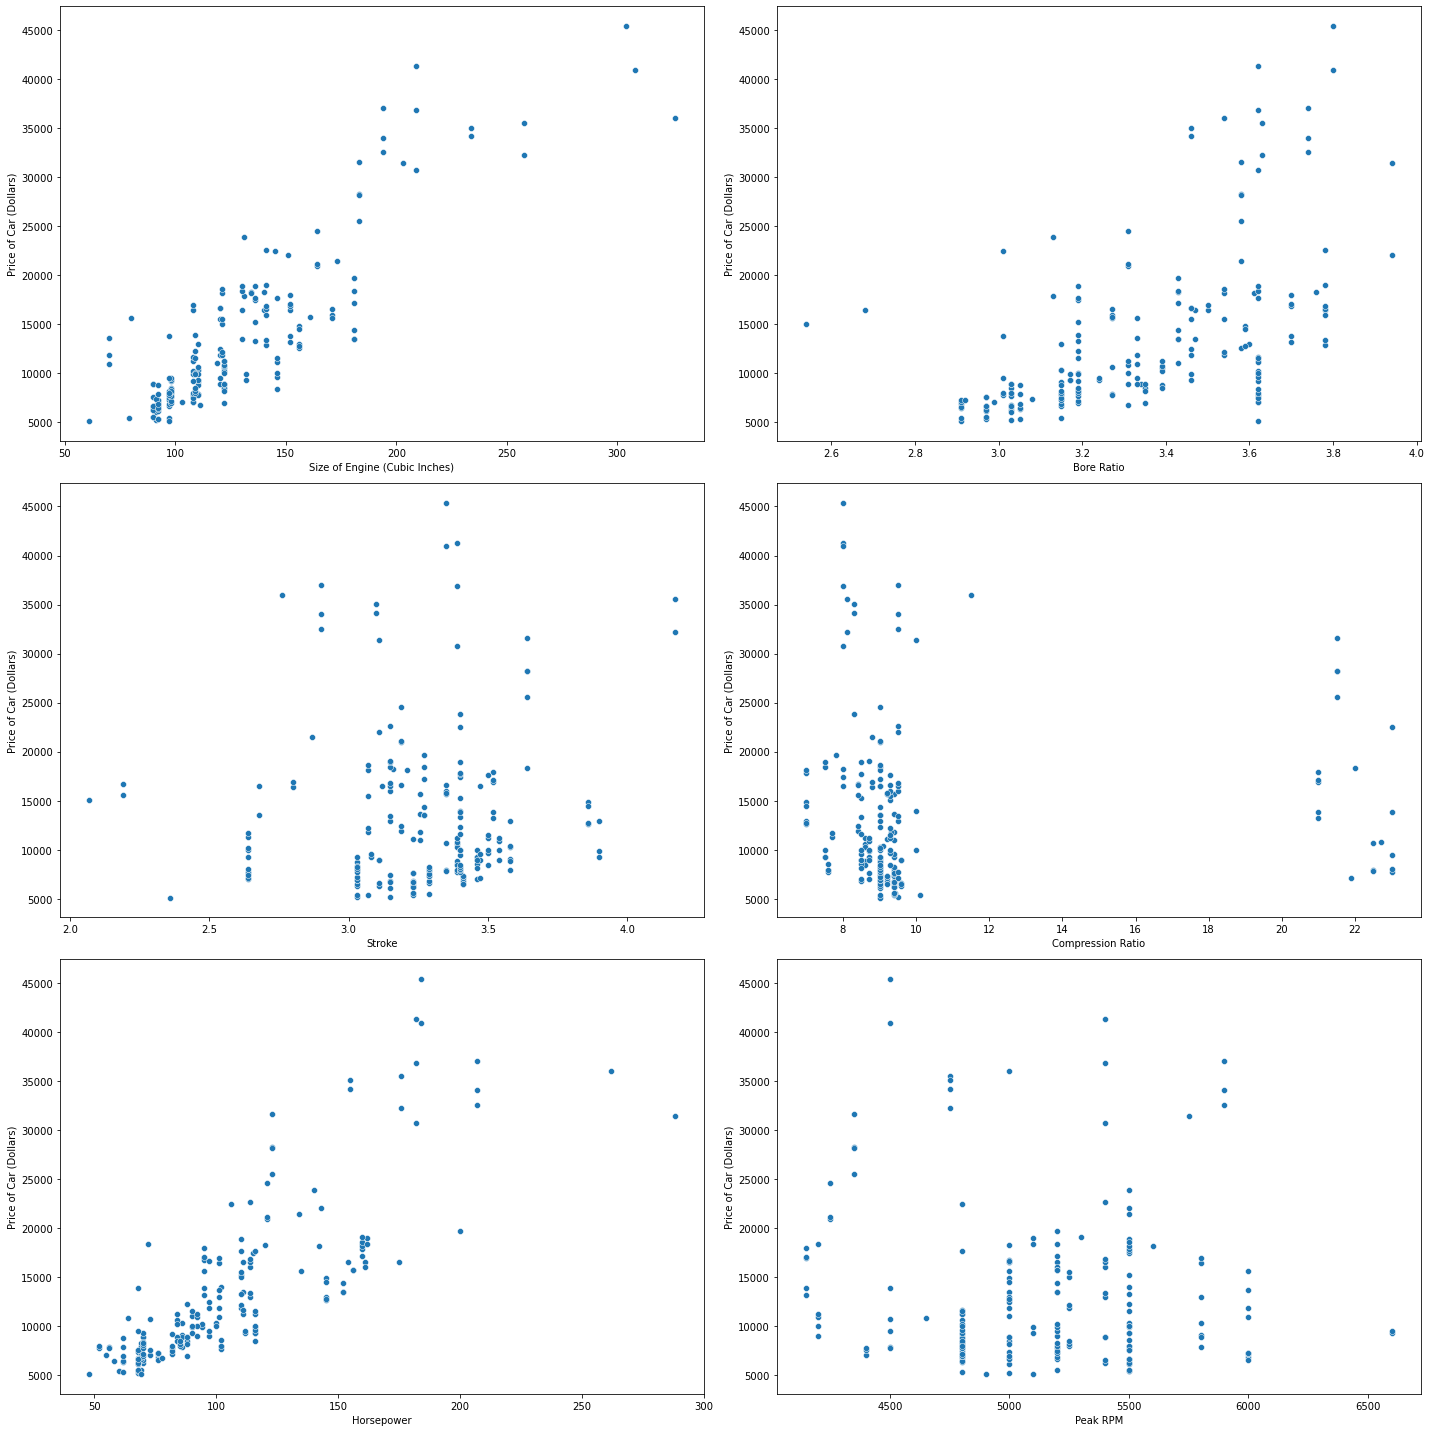

In [52]:
fig, axs = plt.subplots(3,2,figsize=(20,20))
#
plt1 = sns.scatterplot(x = 'enginesize', y = 'price', data = df, ax = axs[0,0])
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
#엔진사이즈와 가격
plt2 = sns.scatterplot(x = 'boreratio', y = 'price', data = df, ax = axs[0,1])
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price of Car (Dollars)')
#보어비와 가격
plt3 = sns.scatterplot(x = 'stroke', y = 'price', data = df, ax = axs[1,0])
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price of Car (Dollars)')
#스트로그와 가격
plt4 = sns.scatterplot(x = 'compressionratio', y = 'price', data = df, ax = axs[1,1])
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price of Car (Dollars)')
#압축비와 가격
plt5 = sns.scatterplot(x = 'horsepower', y = 'price', data = df, ax = axs[2,0])
plt5.set_xlabel('Horsepower')
plt5.set_ylabel('Price of Car (Dollars)')
#마력과 가격
plt5 = sns.scatterplot(x = 'peakrpm', y = 'price', data = df, ax = axs[2,1])
plt5.set_xlabel('Peak RPM')
plt5.set_ylabel('Price of Car (Dollars)')
#최고 RPM과 가격
plt.tight_layout()
plt.show()

- 엔진의 크기, 보어비, 마력은 가격과 양의 상관관계를 갖고 있다.

### City Mileage & Highway Mileage (도시와 고속도로 마일리지)
-연비를 계산

In [40]:
df['mileage'] = df['citympg']*0.55 + df['highwaympg']*0.45

- 도시 55%, 고속도로 45%의 가중 평균을 사용하여 단일 가변 마일리지를 계산

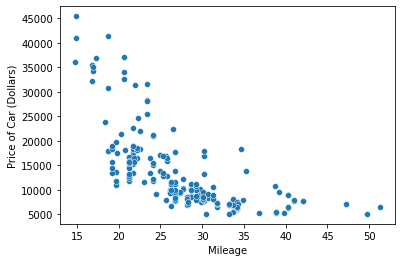

In [41]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

- mileage는 가격과 음의 상관관계를 갖고 있다

### Brand Category - Horsepower

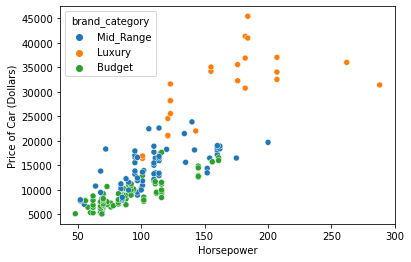

In [42]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = df)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

### Mileage - Fuel Type

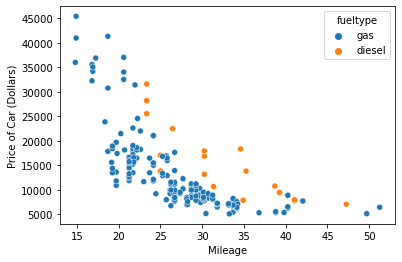

In [51]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'fueltype', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

### Horsepower - Fuel Type

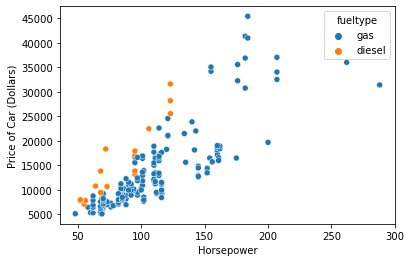

In [50]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = df)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

## 일변량과 이변량 분석 요약:
- 위의 일변량과 이변량 분석을 통해 가격에 큰 영향을 미치지 않는 변수를 걸러 낼 수있다.
-가격 예측을 위한 가장 중요한 변수는 다음과 같다.

Brand Category

Fuel Type

Aspiration

Car Body

Drive Wheel

Wheelbase

Car Length

Car Width

Curb weight

Engine Type

Cylinder Number

Engine Size

Bore Ratio

Horsepower

Mileage

## 선형 회귀 모델

In [53]:
auto = df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'brand_category', 'mileage']]

In [54]:
auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,brand_category,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,Mid_Range,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,Mid_Range,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,Mid_Range,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,Mid_Range,26.70
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,Mid_Range,19.80


## 데이터 시각화


### 숫자 변수 시각화

<Figure size 1080x1080 with 0 Axes>

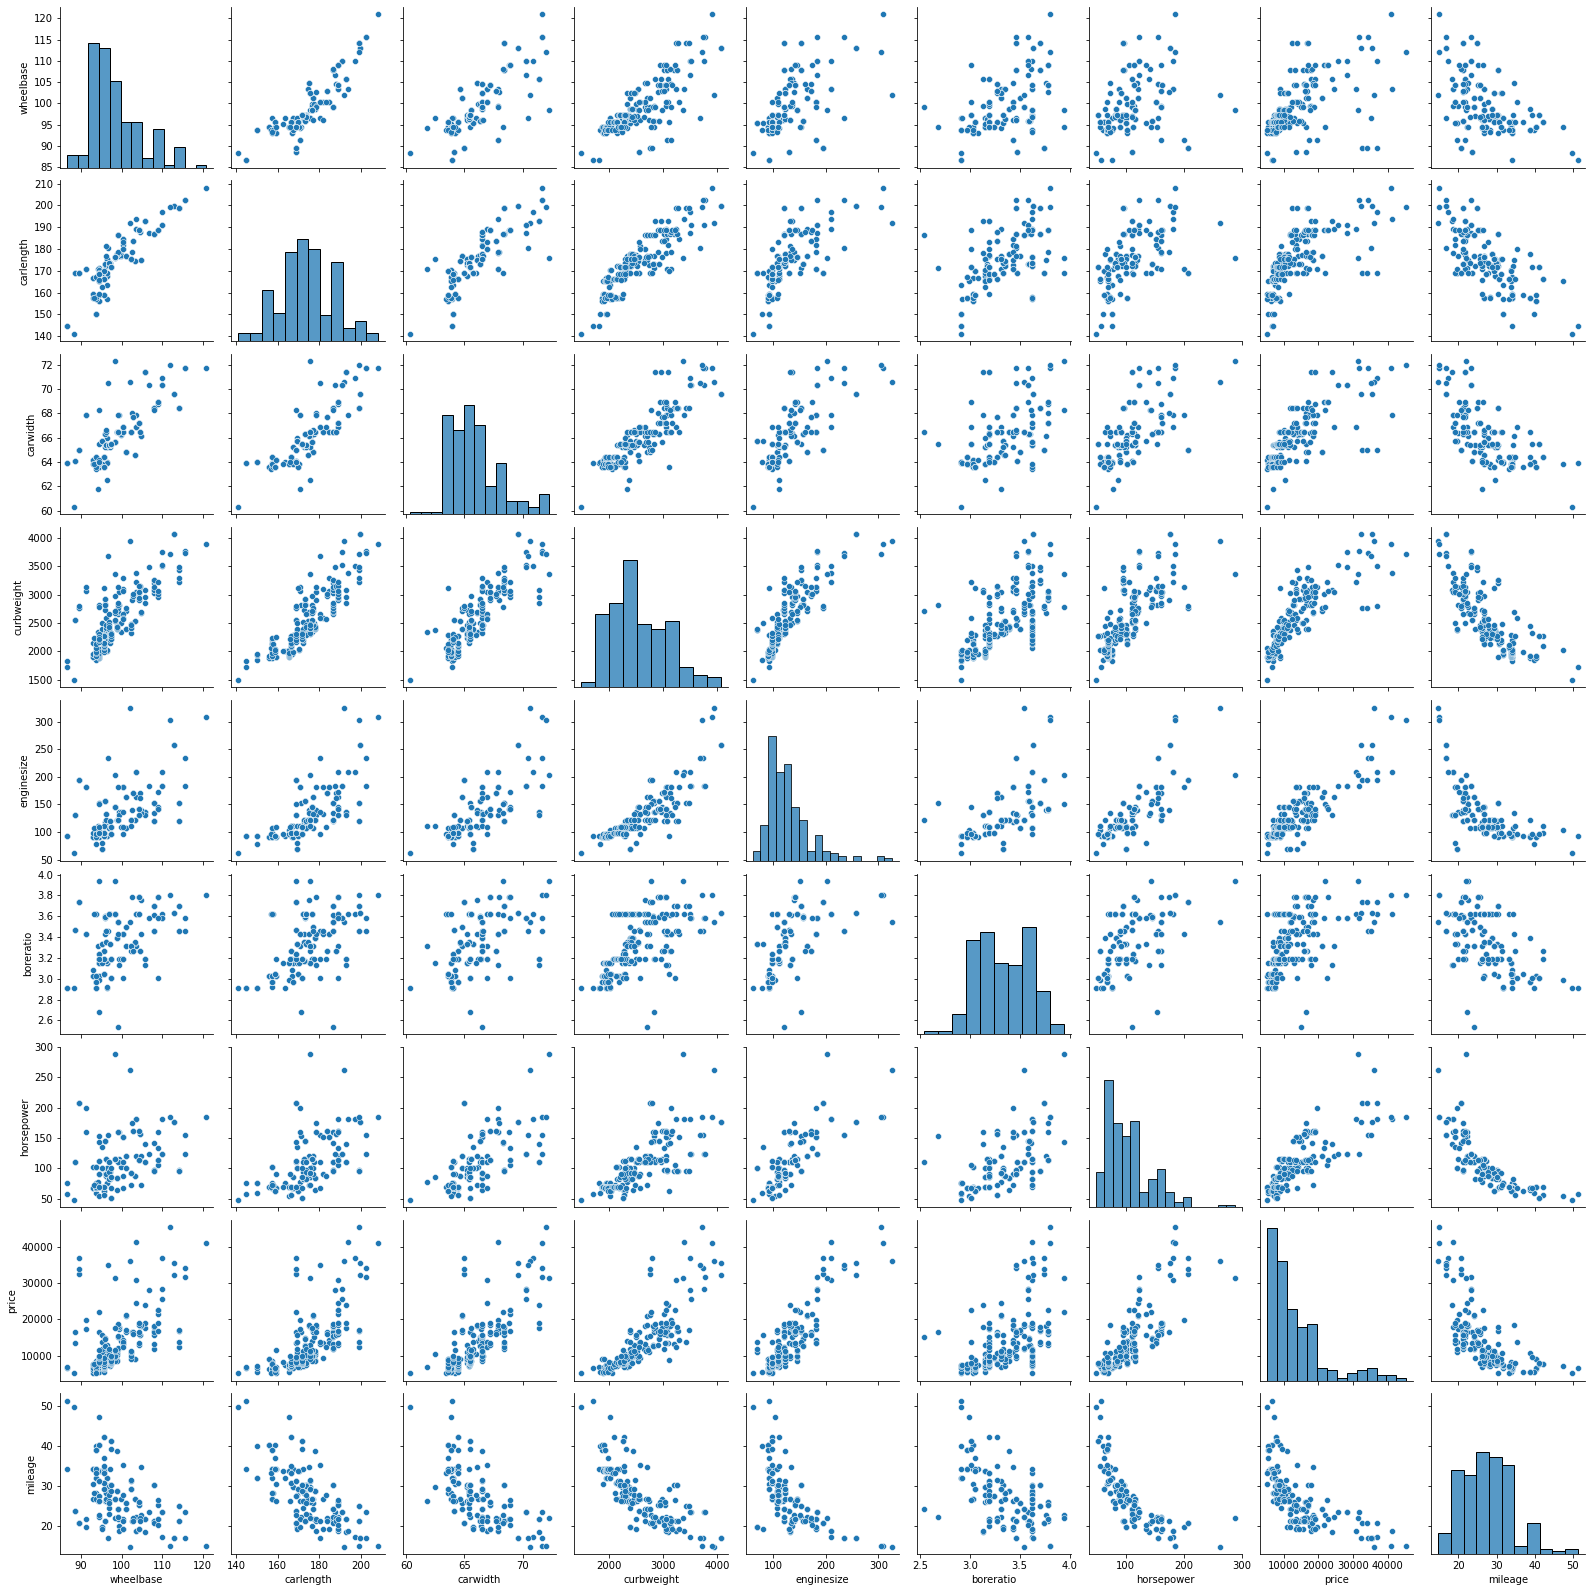

In [56]:
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
#데이터에 들어 있는 각 열들의 모든 상관 관계를 출력
plt.show()

## 범주형 변수 시각화

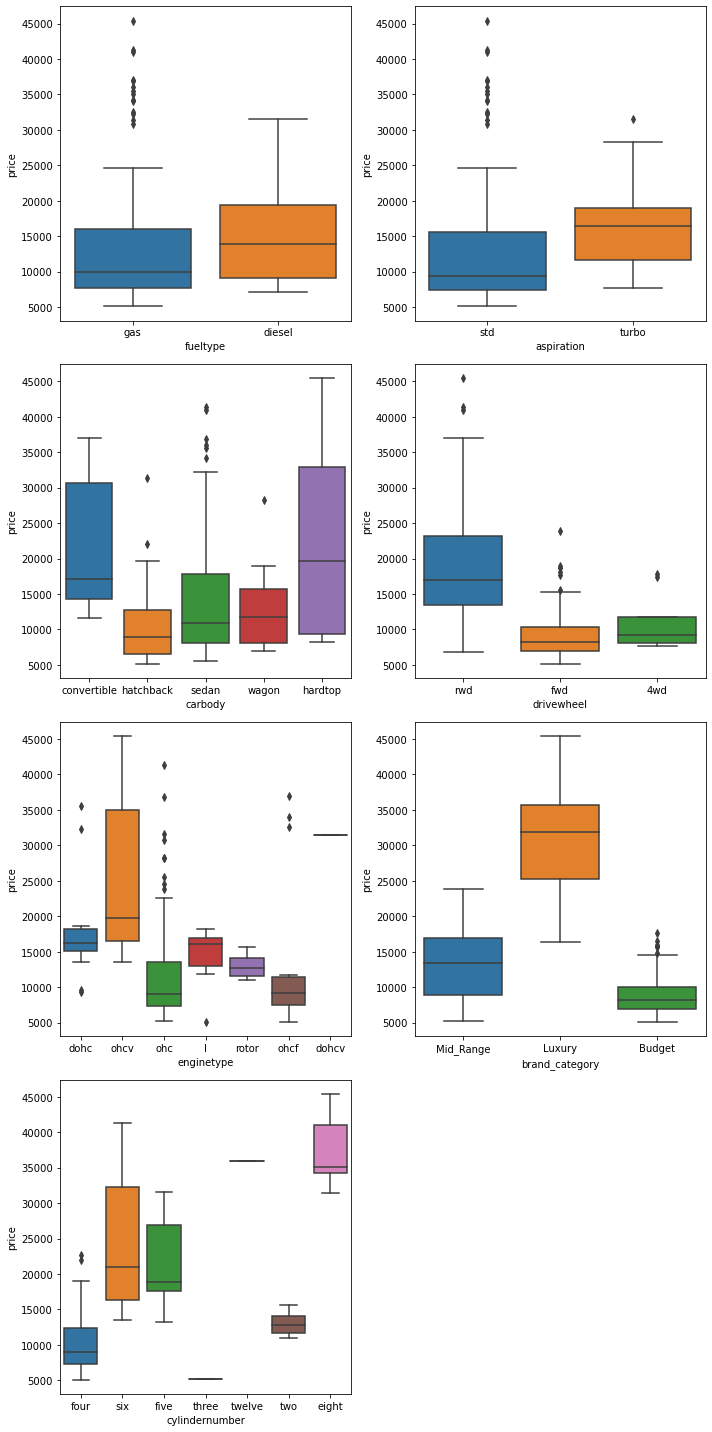

In [57]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = auto)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = auto)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = auto)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = auto)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = auto)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = auto)
plt.subplot(4,2,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = auto)
plt.tight_layout()
plt.show()

## 데이터 다듬기

### dummy_variable = one-hot encoding
-범주형 변수는 더미 변수의 도움을 받아 숫자 변수로 변환한다. 

In [58]:
cyl_no = pd.get_dummies(auto['cylindernumber'], drop_first = True)
#drop_first: 첫번째를 제거하여 k-1개를 가져올지 여부
auto = pd.concat([auto, cyl_no], axis = 1)
#auto에 cyl_no를 붙인다. 
brand_cat = pd.get_dummies(auto['brand_category'], drop_first = True)
auto = pd.concat([auto, brand_cat], axis = 1)

eng_typ = pd.get_dummies(auto['enginetype'], drop_first = True)
auto = pd.concat([auto, eng_typ], axis = 1)

drwh = pd.get_dummies(auto['drivewheel'], drop_first = True)
auto = pd.concat([auto, drwh], axis = 1)

carb = pd.get_dummies(auto['carbody'], drop_first = True)
auto = pd.concat([auto, carb], axis = 1)

asp = pd.get_dummies(auto['aspiration'], drop_first = True)
auto = pd.concat([auto, asp], axis = 1)

fuelt = pd.get_dummies(auto['fueltype'], drop_first = True)
auto = pd.concat([auto, fuelt], axis = 1)

In [59]:
auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber','brand_category'], axis = 1, inplace = True)

## Model Building

### Training/Testing sets 데이터 분할

In [60]:
from sklearn.model_selection import train_test_split
#Training/Testing sets가 동일한 행을 같도록 지정한다.
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)

## feature의 크기 조정

In [61]:
from sklearn.preprocessing import MinMaxScaler
#MinMaxScaler:0과 1 사이에 위치하도록 데이터를 변경
scaler = MinMaxScaler()

- dummy variable을 제외한 모든 열에 scaler()를 적용한다.

In [62]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [63]:
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.068818,0.530864,0,...,0,0,1,0,0,0,1,0,0,1
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.466890,0.213992,0,...,0,0,0,1,0,1,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.122110,0.344307,0,...,0,0,0,1,0,1,0,0,0,1
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.314446,0.244170,0,...,0,0,0,1,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.382131,0.122085,0,...,0,0,0,1,0,0,0,1,1,1


In [64]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.219310,0.358265,0.062937,...,0.062937,0.027972,0.594406,0.349650,0.020979,0.342657,0.475524,0.132867,0.181818,0.909091
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.215682,0.185980,0.243703,...,0.243703,0.165472,0.492733,0.478536,0.143818,0.476266,0.501156,0.340624,0.387050,0.288490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.067298,0.198903,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.140343,0.344307,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.313479,0.512346,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


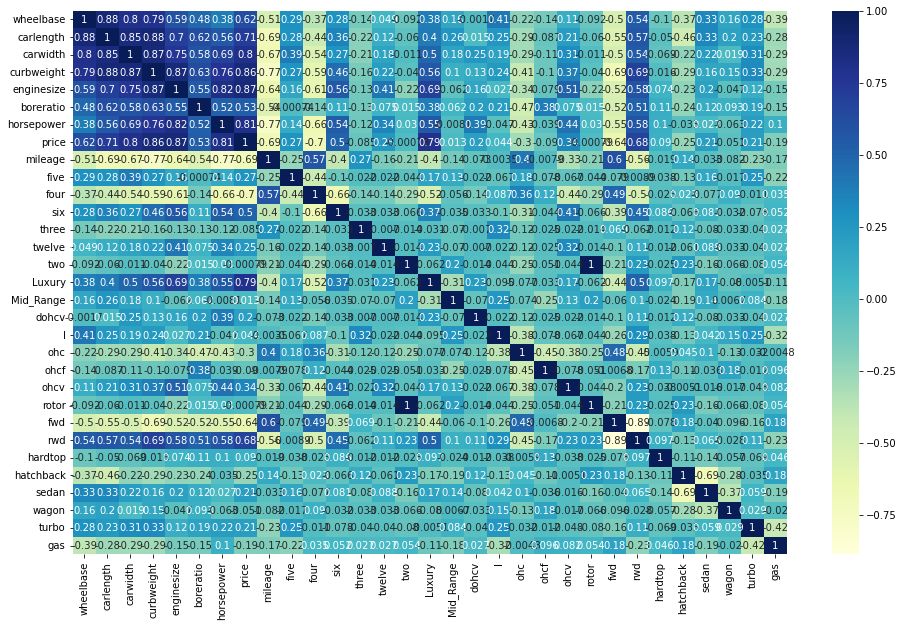

In [65]:
#상관 계수를 확인하여 상관 관계가 높은 변수 확인
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### X와 Y 세트를 구분하여 model building

y_train = df_train.pop('price')
X_train = df_train
#y축:가격, x축:변수

## RFE
### Recursive feature elimination
- 모든 feature들로부터 feature를 하나씩 제거하면서 원하는 개수의 feature가 남을 때까지 이를 반복한다.
- 학습하고 싶은 모델을 정하고 이 모델로 모든 feature를 활용하여 데이터를 학습했을 때의 각 feature의 feature importance를 도출한다.
- feature importrance가 낮은 feature부터 하나씩 제거하면서 원하는 feature 개수가 될 때까지 이를 반복 하고, 남은 feature들은 최종 feature selection 결과가 된다.

In [69]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [70]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
#튜플 형태로 묶는다.

[('wheelbase', False, 3),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 20),
 ('Luxury', True, 1),
 ('Mid_Range', False, 12),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 21),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('turbo', False, 18),
 ('gas', False, 17)]

In [71]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'horsepower', 'mileage', 'twelve', 'Luxury',
       'dohcv', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

### 상세 통계를 위한 statsmodels

In [72]:
X_train_rfe=X_train[col]
#RFE를 선택한 변수를 사용함.

In [74]:
!pip install statsmodels

In [75]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [77]:
lm = sm.OLS(y_train,X_train_rfe).fit() #OLS:잔차제곱합

In [78]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           1.29e-70
Time:                        01:38:30   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0947      0.042     -2.243      0.0

- 다중공선성: 독립변수들 간에 강한 상관 관계가 나타나서, 회귀 분석의 전제 가정인 독립변수들 간에 상관 관계가 높으면 안 된다는 조건을 위배하는 경우
- VIF(분산팽창요인): 다중 회귀 모델에서 독립 변수간 상관 관계가 있는지 측정하는 척도

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2) #지정한 자릿수로 반올림
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.51
2,curbweight,8.38
9,sedan,6.18
3,horsepower,5.94
8,hatchback,5.68
1,carwidth,5.19
4,mileage,3.74
10,wagon,3.62
7,dohcv,1.73
6,Luxury,1.68


- VIF 값이 높을 수록 다중공선성의 문제가 일으킬 수 있다고 판단함.(10이상이면 문제가 있을 수 있음)

In [80]:
X_train_new1 = X_train_rfe.drop(["twelve"], axis = 1)


import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model


print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           4.25e-71
Time:                        01:55:43   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0764      0.041     -1.851      0.0

In [82]:
X_train_new2 = X_train_new1.drop(["mileage"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           7.86e-72
Time:                        02:12:56   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [83]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.90
2,curbweight,8.10
7,sedan,6.07
6,hatchback,5.63
1,carwidth,5.14
3,horsepower,3.61
8,wagon,3.58
4,Luxury,1.63
5,dohcv,1.46


In [84]:
# Dropping mileage as p-value is high.
X_train_new3 = X_train_new2.drop(["curbweight"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new3)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           4.70e-70
Time:                        02:14:13   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [85]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.89
6,sedan,6.06
5,hatchback,5.54
7,wagon,3.47
2,horsepower,2.50
1,carwidth,2.22
3,Luxury,1.56
4,dohcv,1.21


In [86]:
# Dropping sedan as VIF value is high.
X_train_new4 = X_train_new3.drop(["sedan"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new4)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           1.68e-69
Time:                        02:14:40   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [87]:
# Dropping wagon as p value is high.
X_train_new5 = X_train_new4.drop(["wagon"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new5)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           1.57e-70
Time:                        02:14:51   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [88]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.39
2,horsepower,2.39
1,carwidth,2.08
3,Luxury,1.53
4,dohcv,1.21
5,hatchback,1.13


In [89]:
# Dropping dohcv to see if any change in model.
X_train_new6 = X_train_new5.drop(["dohcv"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new6)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           1.04e-67
Time:                        02:15:08   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

### train data의 잔차 분석 
- 잔차는 모형의 한 단계 예측 출력과 검증 데이터 집합의 측정된 출력 사이의 차이이다. 따라서 잔차는 검증 데이터에서 모형에 의해 설명되지 않는 부분을 나타냄.
- 오차항도 정규 분포를 따르는지 확인 하기 위해 오차항 히스토그램을 그려서 확인한다.

Text(0.5, 0, 'Errors')

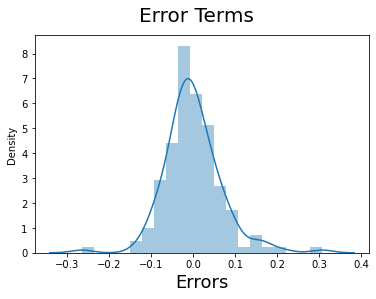

In [90]:
y_train_price = lm.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## 예측하기
### test sets에 비율 적용하기

In [91]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [92]:
y_test = df_test.pop('price')
X_test = df_test

In [93]:
X_test_new = X_test[['carwidth', 'horsepower', 'Luxury', 'hatchback']]

X_test_new = sm.add_constant(X_test_new)

In [94]:
y_pred = lm.predict(X_test_new)

## 모델 평가

In [95]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8986678382302791

Text(0, 0.5, 'y_pred')

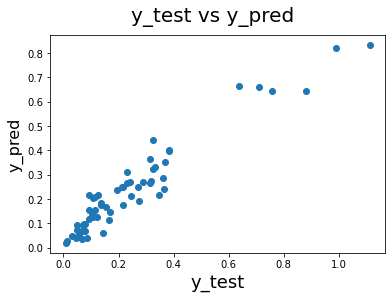

In [96]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [ ]:
???